# EJERCICIO [Pinguinos](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)


Diseñar y entrenar una red neuronal para clasificar la especie de los pinguinos en el dataset


Todas las variables sin escalar
Todas las variables escaladas
Con variables que esten correlacionadas y escalar esos atributos

In [1]:
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import time as time
import matplotlib.pyplot as plt
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
df = sns.load_dataset("penguins")

In [23]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [24]:
print(df['species'].unique())


['Adelie' 'Chinstrap' 'Gentoo']


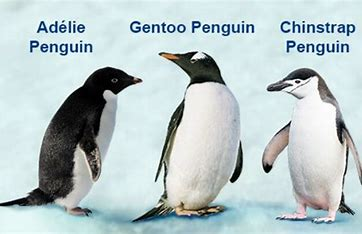

In [25]:
class_names = df['species'].unique()
print(class_names)

['Adelie' 'Chinstrap' 'Gentoo']


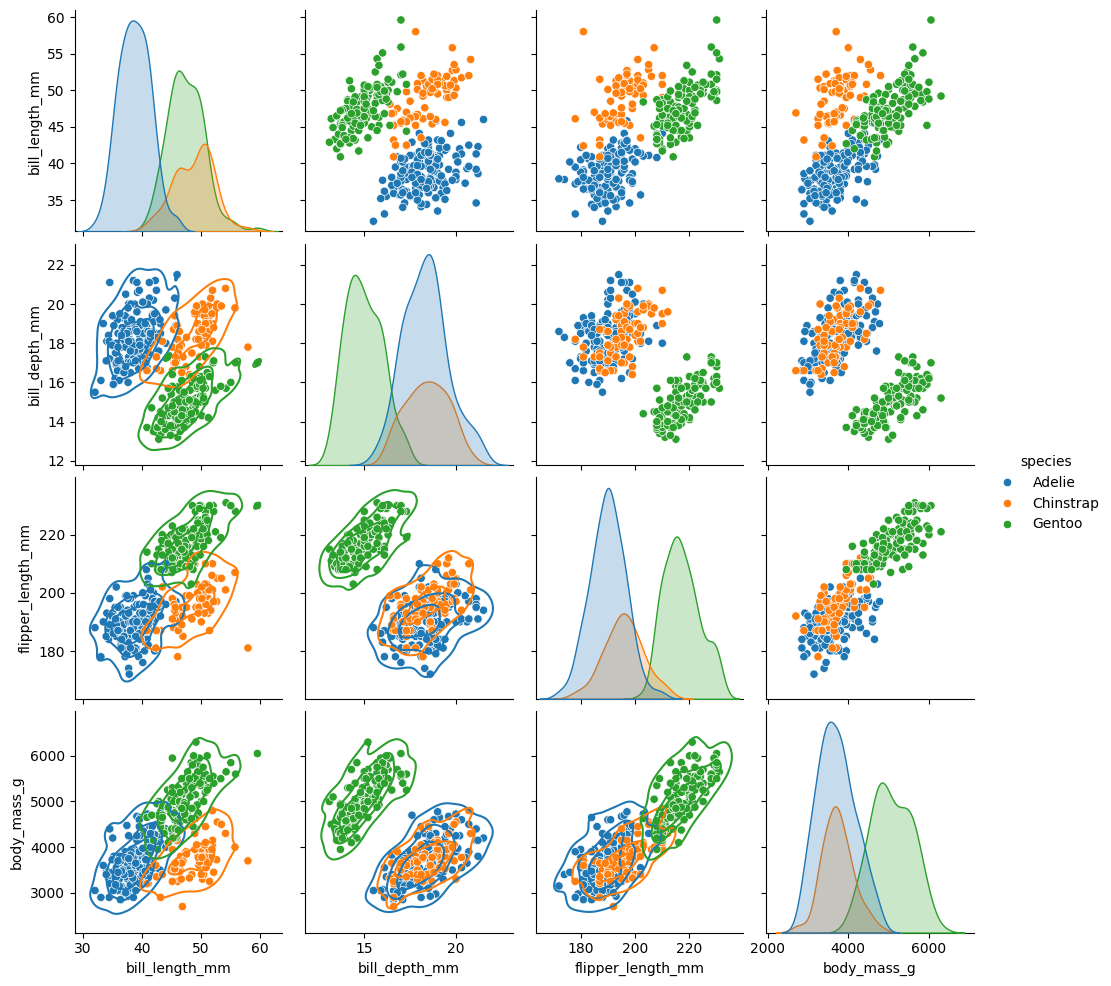

In [26]:
g = sns.pairplot(df, diag_kind="kde", hue="species")
g.map_lower(sns.kdeplot, levels=4, color=".2")

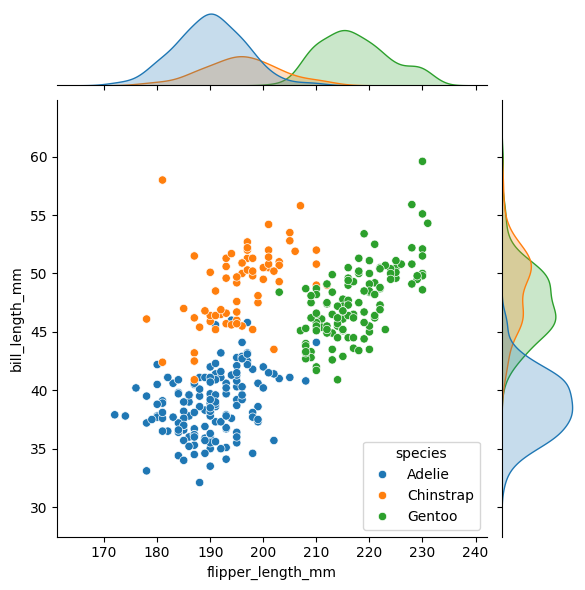

In [27]:
sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [28]:
# Drop non-numeric columns before calculating correlation
df = df.drop(columns=['species', 'island', 'sex'])
display(df.corr())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


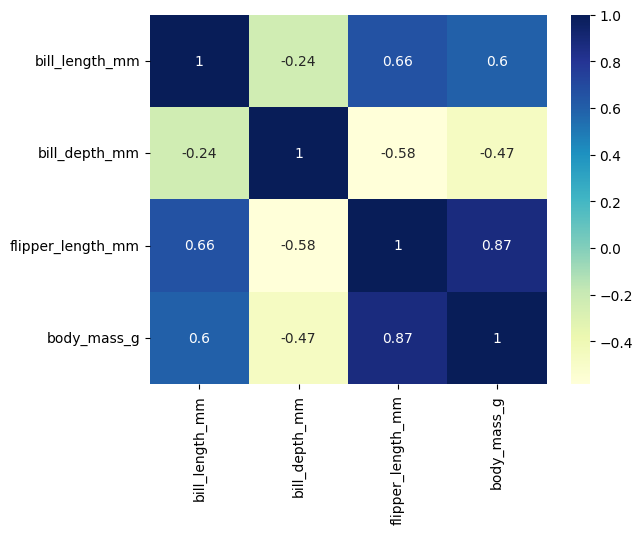

In [29]:
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

#Limpieza
Aqui comienza la seccion de limpieza de datos

In [30]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


In [13]:
numeric_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
numeric_df.isnull().sum()

,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (333, 7)
Tamaño del set después de eliminar las filas repetidas: (333, 7)


In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#MODELO 1 En esta sección se realizara el preprocesamiento para el modelo con todas las variables

###Preprocesamiento

En esta seccion se realizara lo necesario para que los datos queden listos para el algoritmo

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df['island'] = le.fit_transform(df['island'])

In [ ]:
df["sex"] = le.fit_transform(df['sex'])

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,0
340,Gentoo,0,46.8,14.3,215.0,4850.0,0
341,Gentoo,0,50.4,15.7,222.0,5750.0,1
342,Gentoo,0,45.2,14.8,212.0,5200.0,0


In [ ]:
oht = OneHotEncoder()

In [ ]:
# Convertimos la columna "species" a una variable categórica
df["species"] = df["species"].astype("category")

In [ ]:
# Realizamos el onehotencoder
df_dummie = pd.get_dummies(df, columns=["species"], prefix=["species"])

In [ ]:
df_dummie

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,2,39.1,18.7,181.0,3750.0,1,1,0,0
1,2,39.5,17.4,186.0,3800.0,0,1,0,0
2,2,40.3,18.0,195.0,3250.0,0,1,0,0
4,2,36.7,19.3,193.0,3450.0,0,1,0,0
5,2,39.3,20.6,190.0,3650.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0,0,0,1
340,0,46.8,14.3,215.0,4850.0,0,0,0,1
341,0,50.4,15.7,222.0,5750.0,1,0,0,1
342,0,45.2,14.8,212.0,5200.0,0,0,0,1


###Robutscaler para normalizacion de los datos

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['species', 'island', "bill_length_mm", 'bill_depth_mm', 'flipper_length_mm', "body_mass_g"]

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna species: 3 subniveles
Columna island: 3 subniveles
Columna bill_length_mm: 163 subniveles
Columna bill_depth_mm: 79 subniveles
Columna flipper_length_mm: 54 subniveles
Columna body_mass_g: 93 subniveles


In [ ]:
df1 = df_dummie[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [ ]:
df1_robustscaler = preprocessing.RobustScaler().fit_transform(df1)
df1_robustscaler1 = pd.DataFrame(df1_robustscaler, columns=df1.columns)

In [ ]:
df1_robustscaler1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.593407,0.451613,-0.695652,-0.244898
1,-0.549451,0.032258,-0.478261,-0.204082
2,-0.461538,0.225806,-0.086957,-0.653061
3,-0.857143,0.645161,-0.173913,-0.489796
4,-0.571429,1.064516,-0.304348,-0.326531
...,...,...,...,...
328,0.296703,-1.161290,0.739130,0.714286
329,0.252747,-0.967742,0.782609,0.653061
330,0.648352,-0.516129,1.086957,1.387755
331,0.076923,-0.806452,0.652174,0.938776


In [ ]:
df2 = df_dummie[["species_Adelie", "species_Chinstrap",	"species_Gentoo","island", "sex"]]

In [ ]:
df2

,species_Adelie,species_Chinstrap,species_Gentoo,island,sex
0,1,0,0,2,1
1,1,0,0,2,0
2,1,0,0,2,0
4,1,0,0,2,0
5,1,0,0,2,1
...,...,...,...,...,...
338,0,0,1,0,0
340,0,0,1,0,0
341,0,0,1,0,1
342,0,0,1,0,0


In [ ]:
df3 = pd.concat([df1_robustscaler1, df2], axis="columns")
df3

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island,sex
0,-0.593407,0.451613,-0.695652,-0.244898,1.0,0.0,0.0,2.0,1.0
1,-0.549451,0.032258,-0.478261,-0.204082,1.0,0.0,0.0,2.0,0.0
2,-0.461538,0.225806,-0.086957,-0.653061,1.0,0.0,0.0,2.0,0.0
3,-0.857143,0.645161,-0.173913,-0.489796,NaN,NaN,NaN,NaN,NaN
4,-0.571429,1.064516,-0.304348,-0.326531,1.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
338,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
340,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
341,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0
342,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0


In [ ]:
df3.isnull().sum()

bill_length_mm       9
bill_depth_mm        9
flipper_length_mm    9
body_mass_g          9
species_Adelie       9
species_Chinstrap    9
species_Gentoo       9
island               9
sex                  9
dtype: int64

In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island               0
sex                  0
dtype: int64

In [ ]:
dfx= df3.drop(["species_Adelie",	"species_Chinstrap",	"species_Gentoo"], axis=1)

In [ ]:
dfy= df3.drop(["island",	"bill_length_mm",	"bill_depth_mm",	"flipper_length_mm", "sex", "body_mass_g"], axis=1)

##Modelo
En esta seccion se realizara el modelo de prediccion

In [ ]:
X = dfx

In [ ]:
Y = dfy

In [ ]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,-0.593407,0.451613,-0.695652,-0.244898,2.0,1.0
1,-0.549451,0.032258,-0.478261,-0.204082,2.0,0.0
2,-0.461538,0.225806,-0.086957,-0.653061,2.0,0.0
4,-0.571429,1.064516,-0.304348,-0.326531,2.0,0.0
5,-0.615385,0.161290,-0.695652,-0.346939,2.0,1.0
...,...,...,...,...,...,...
328,0.296703,-1.161290,0.739130,0.714286,0.0,0.0
329,0.252747,-0.967742,0.782609,0.653061,0.0,1.0
330,0.648352,-0.516129,1.086957,1.387755,0.0,0.0
331,0.076923,-0.806452,0.652174,0.938776,0.0,1.0


In [ ]:
Y

,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
...,...,...,...
328,0.0,0.0,1.0
329,0.0,0.0,1.0
330,0.0,0.0,1.0
331,0.0,0.0,1.0


In [ ]:
Y['species_Adelie'] = Y['species_Adelie'].astype(int)

In [ ]:
Y['species_Chinstrap'] = Y['species_Chinstrap'].astype(int)

In [ ]:
Y['species_Gentoo'] = Y['species_Gentoo'].astype(int)

In [ ]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   species_Adelie     324 non-null    int64
 1   species_Chinstrap  324 non-null    int64
 2   species_Gentoo     324 non-null    int64
dtypes: int64(3)
memory usage: 10.1 KB
None


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)

In [ ]:
print(X_train.shape, y_train.shape)

(158, 6) (158, 3)


In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],), name="DatosSinteticos1")
hidden = Dense(15, activation = 'relu', input_dim = df.shape[1]) (inputs)
outputs = Dense(3, activation="softmax", name="predictions")(hidden)

modelo = keras.Model(inputs=inputs, outputs=outputs)

config  = modelo.get_config()
weights = modelo.get_weights()

In [ ]:
t = time.time()
mejores_parametros_val = {'acc':0,
                            'lr':0,
                            'opt': None,
                            'batch_size':0
                          }
BusquedaConcluida = False
for lr in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    for batch_s in [16,32,64]:
      for opt in [keras.optimizers.Adam( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr, momentum = 0.9 ), keras.optimizers.Nadam( learning_rate = lr )]:
            model = keras.Model.from_config(config)
            model.set_weights(weights)
            model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
            historial = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100,  verbose=0, batch_size = batch_s )
            pred = model.evaluate( X_val, y_val , verbose = 0 )
            print('lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1])
            if( pred[1] > mejores_parametros_val['acc'] ):
                mejores_parametros_val['acc']        = pred[1]
                mejores_parametros_val['lr']         = lr
                mejores_parametros_val['opt']        = opt
                mejores_parametros_val['batch_size'] = batch_s
                best_config    = model.get_config()
                best_weights   = model.get_weights()
                best_historial2 = historial
                print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1],'<--------------------')
                if( pred[1] == 1.0 ) :
                    print("Entrenamiento completo :) ")
                    BusquedaConcluida = True
                    break
      if( BusquedaConcluida == True ):
            break
    if( BusquedaConcluida == True ):
            break
print(f'Tiempo de entrenamiento {(time.time() - t)/60:.5f} mins')

lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7f545150d1b0> batch_size= 16 acc= 0.779411792755127
--------> lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7f545150d1b0> batch_size= 16 acc= 0.779411792755127 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7f545150d390> batch_size= 16 acc= 0.3235294222831726
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7f545150d5d0> batch_size= 16 acc= 0.8676470518112183
--------> lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7f545150d5d0> batch_size= 16 acc= 0.8676470518112183 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7f545150d840> batch_size= 16 acc= 0.779411792755127
lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7f545150c640> batch_size= 32 acc= 0.38235294818878174
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7f5450b754e0> batch_size= 32 acc= 0.3235294222831726
lr= 0.0001 , opt= <keras

In [ ]:
best_model = keras.Model.from_config(best_config)
best_model.set_weights(best_weights)

In [ ]:

#model = keras.Model.from_config(config)
#model.set_weights(weights)

lr =  mejores_parametros_val['lr']
opt = keras.optimizers.Nadam( learning_rate = lr )
batch_s = mejores_parametros_val['batch_size']
print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',mejores_parametros_val['acc'])
best_model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'] )
scores_train = best_model.evaluate( X_train, y_train, verbose = 0 )
print(f'Precisión en el conjunto de entrenamiento = {np.round(scores_train[1]*100,decimals=2)}%')
scores_val = best_model.evaluate( X_val, y_val, verbose = 0 )
print(f'Precisión en el conjunto de validacion = {np.round(scores_val[1]*100,decimals=2)}%' )
scores_test = best_model.evaluate( X_test, y_test, verbose = 0 )
print(f'Precisión en el conjunto de prueba = {np.round(scores_test[1]*100,decimals=2)}%' )

--------> lr= 0.0005 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7f544d6b7f10> batch_size= 16 acc= 0.970588207244873
Precisión en el conjunto de entrenamiento = 89.87%
Precisión en el conjunto de validacion = 97.06%
Precisión en el conjunto de prueba = 93.88%


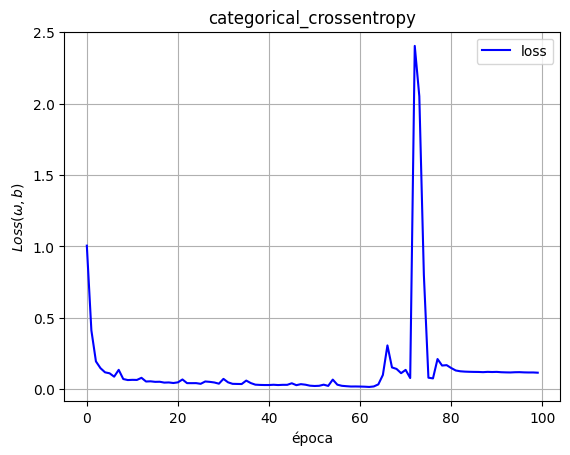

In [ ]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label="loss")

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.ylim([np.min(historial.history['loss'])-0.1,np.max(historial.history['loss'])+0.1])
plt.grid(True)
plt.show()

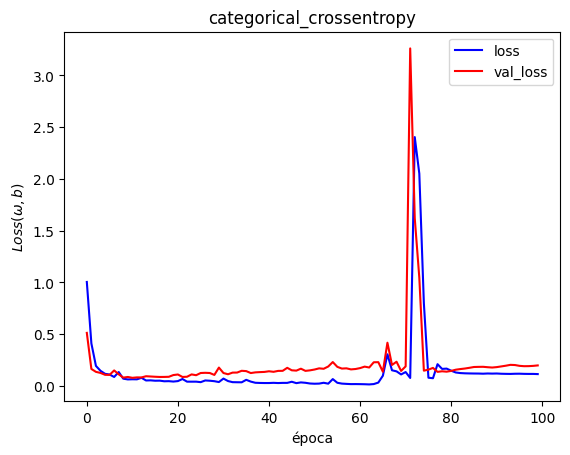

In [ ]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label='loss')
plt.plot(historial.epoch,historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.show()

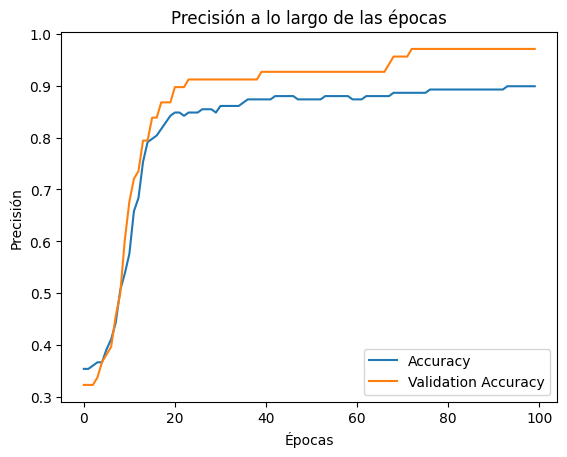

In [ ]:
plt.plot(best_historial2.history['categorical_accuracy'], label='Accuracy')
plt.plot(best_historial2.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_test

,species_Adelie,species_Chinstrap,species_Gentoo
159,0,1,0
90,1,0,0
193,0,1,0
316,0,0,1
41,1,0,0
...,...,...,...
129,1,0,0
281,0,0,1
93,1,0,0
125,1,0,0


###MATRIZ DE CONFUSIÓN (CONFUSIO)

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
y_pred_class = y_pred.argmax(axis=-1)

In [ ]:
y_test_np = y_test.to_numpy()
y_test_class = y_test_np.argmax(axis=-1 )

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[46  3  0]
 [ 1 16  0]
 [ 0  6 26]]


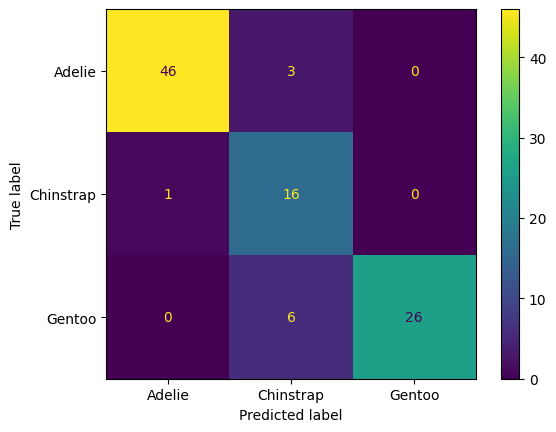

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = cm ,  display_labels = class_names).plot()
plt.show()

#MODELO 2: Con variables sin escalar

In [ ]:
df_dummie

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,2,39.1,18.7,181.0,3750.0,1,1,0,0
1,2,39.5,17.4,186.0,3800.0,0,1,0,0
2,2,40.3,18.0,195.0,3250.0,0,1,0,0
4,2,36.7,19.3,193.0,3450.0,0,1,0,0
5,2,39.3,20.6,190.0,3650.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0,0,0,1
340,0,46.8,14.3,215.0,4850.0,0,0,0,1
341,0,50.4,15.7,222.0,5750.0,1,0,0,1
342,0,45.2,14.8,212.0,5200.0,0,0,0,1


In [ ]:
snx= df_dummie.drop(["species_Adelie",	"species_Chinstrap",	"species_Gentoo"], axis=1)

In [ ]:
snx

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [ ]:
sny = df_dummie.drop(["island",	"bill_length_mm",	"bill_depth_mm",	"flipper_length_mm", "sex", "body_mass_g"], axis=1)

In [ ]:
sny

,species_Adelie,species_Chinstrap,species_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


##Modelo secuencial para deep learning

In [ ]:
X_sn = snx

In [ ]:
Y_sn = sny

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)

In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],), name="pinguinos2")
hidden = Dense(15, activation = 'relu', input_dim = df.shape[1]) (inputs)
outputs = Dense(3, activation="sigmoid", name="predictions")(hidden)

modelo = keras.Model(inputs=inputs, outputs=outputs)

config  = modelo.get_config()
weights = modelo.get_weights()

In [ ]:
t = time.time()
mejores_parametros_val = {'acc':0,
                            'lr':0,
                            'opt': None,
                            'batch_size':0
                          }
BusquedaConcluida = False
for lr in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    for batch_s in [16,32,64]:
      for opt in [keras.optimizers.Adam( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr, momentum = 0.9 ), keras.optimizers.Nadam( learning_rate = lr )]:
            model = keras.Model.from_config(config)
            model.set_weights(weights)
            model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
            historial = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100,  verbose=0, batch_size = batch_s )
            pred = model.evaluate( X_val, y_val , verbose = 0 )
            print('lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1])
            if( pred[1] > mejores_parametros_val['acc'] ):
                mejores_parametros_val['acc']        = pred[1]
                mejores_parametros_val['lr']         = lr
                mejores_parametros_val['opt']        = opt
                mejores_parametros_val['batch_size'] = batch_s
                best_config    = model.get_config()
                best_weights   = model.get_weights()
                best_historial2 = historial
                print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1],'<--------------------')
                if( pred[1] == 1.0 ) :
                    print("Entrenamiento completo :) ")
                    BusquedaConcluida = True
                    break
      if( BusquedaConcluida == True ):
            break
    if( BusquedaConcluida == True ):
            break
print(f'Tiempo de entrenamiento {(time.time() - t)/60:.5f} mins')

lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6b8ed600> batch_size= 16 acc= 0.8088235259056091
--------> lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6b8ed600> batch_size= 16 acc= 0.8088235259056091 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6b8ed390> batch_size= 16 acc= 0.38235294818878174
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6b8ed420> batch_size= 16 acc= 0.8235294222831726
--------> lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6b8ed420> batch_size= 16 acc= 0.8235294222831726 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd6b8ec100> batch_size= 16 acc= 0.8088235259056091
lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6b8ec5e0> batch_size= 32 acc= 0.5
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd69b503a0> batch_size= 32 acc= 0.38235294818878174
lr= 0.0001 , opt= <keras.src.optimi

In [ ]:
best_model = keras.Model.from_config(best_config)
best_model.set_weights(best_weights)

In [ ]:
#model = keras.Model.from_config(config)
#model.set_weights(weights)

lr =  mejores_parametros_val['lr']
opt = keras.optimizers.Nadam( learning_rate = lr )
batch_s = mejores_parametros_val['batch_size']
print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',mejores_parametros_val['acc'])
best_model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'] )
scores_train = best_model.evaluate( X_train, y_train, verbose = 0 )
print(f'Precisión en el conjunto de entrenamiento = {np.round(scores_train[1]*100,decimals=2)}%')
scores_val = best_model.evaluate( X_val, y_val, verbose = 0 )
print(f'Precisión en el conjunto de validacion = {np.round(scores_val[1]*100,decimals=2)}%' )
scores_test = best_model.evaluate( X_test, y_test, verbose = 0 )
print(f'Precisión en el conjunto de prueba = {np.round(scores_test[1]*100,decimals=2)}%' )

--------> lr= 0.05 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd6b8ec6a0> batch_size= 32 acc= 0.9852941036224365
Precisión en el conjunto de entrenamiento = 98.73%
Precisión en el conjunto de validacion = 98.53%
Precisión en el conjunto de prueba = 94.9%


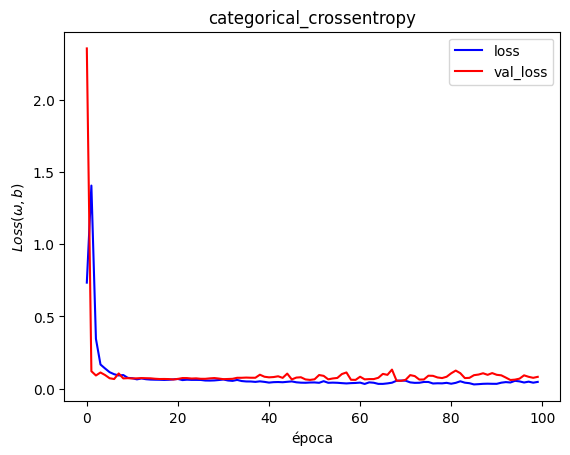

In [ ]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label='loss')
plt.plot(historial.epoch,historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.show()

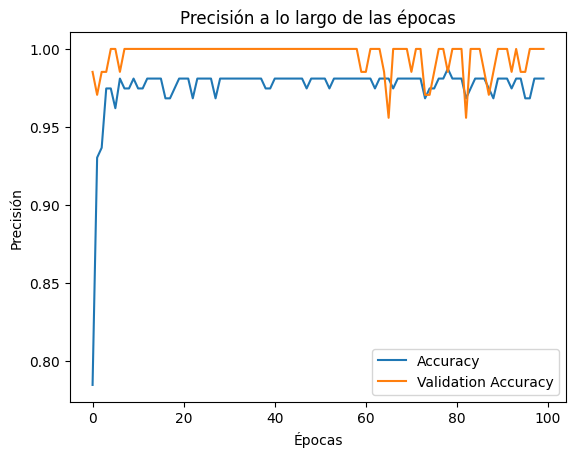

In [ ]:
plt.plot(best_historial2.history['categorical_accuracy'], label='Accuracy')
plt.plot(best_historial2.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

###Matriz de confusión

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class = y_pred.argmax(axis=-1)

In [ ]:
y_test_np = y_test.to_numpy()
y_test_class = y_test_np.argmax(axis=-1 )

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[38  2  0]
 [ 2 23  0]
 [ 0  0 33]]


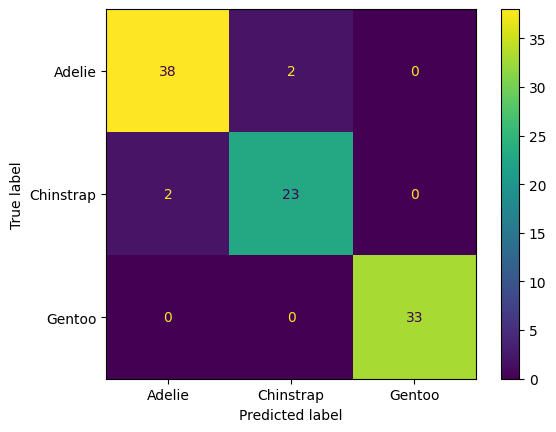

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = cm ,  display_labels = class_names).plot()
plt.show()

#Modelo 3 Variables escogidas basado en literatura científica escaladas

In [ ]:
df_dummie

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,2,39.1,18.7,181.0,3750.0,1,1,0,0
1,2,39.5,17.4,186.0,3800.0,0,1,0,0
2,2,40.3,18.0,195.0,3250.0,0,1,0,0
4,2,36.7,19.3,193.0,3450.0,0,1,0,0
5,2,39.3,20.6,190.0,3650.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0,0,0,1
340,0,46.8,14.3,215.0,4850.0,0,0,0,1
341,0,50.4,15.7,222.0,5750.0,1,0,0,1
342,0,45.2,14.8,212.0,5200.0,0,0,0,1


In [ ]:
dfsn = df_dummie.drop(["body_mass_g","sex"], axis=1)

##Robutscaler para normalizacion de datos

In [ ]:
dfsn1 = dfsn[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]

In [ ]:
dfsn1_robustscaler = preprocessing.RobustScaler().fit_transform(dfsn1)
dfsn1_robustscaler1 = pd.DataFrame(dfsn1_robustscaler, columns=dfsn1.columns)

In [ ]:
df1_robustscaler1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.593407,0.451613,-0.695652,-0.244898
1,-0.549451,0.032258,-0.478261,-0.204082
2,-0.461538,0.225806,-0.086957,-0.653061
3,-0.857143,0.645161,-0.173913,-0.489796
4,-0.571429,1.064516,-0.304348,-0.326531
...,...,...,...,...
328,0.296703,-1.161290,0.739130,0.714286
329,0.252747,-0.967742,0.782609,0.653061
330,0.648352,-0.516129,1.086957,1.387755
331,0.076923,-0.806452,0.652174,0.938776


In [ ]:
dfsn2 = dfsn[["species_Adelie", "species_Chinstrap",	"species_Gentoo","island"]]

In [ ]:
dfsn2

,species_Adelie,species_Chinstrap,species_Gentoo,island
0,1,0,0,2
1,1,0,0,2
2,1,0,0,2
4,1,0,0,2
5,1,0,0,2
...,...,...,...,...
338,0,0,1,0
340,0,0,1,0
341,0,0,1,0
342,0,0,1,0


In [ ]:
sndf = pd.concat([dfsn1_robustscaler1, dfsn2], axis="columns")
sndf

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island
0,-0.593407,0.451613,-0.695652,1.0,0.0,0.0,2.0
1,-0.549451,0.032258,-0.478261,1.0,0.0,0.0,2.0
2,-0.461538,0.225806,-0.086957,1.0,0.0,0.0,2.0
3,-0.857143,0.645161,-0.173913,NaN,NaN,NaN,NaN
4,-0.571429,1.064516,-0.304348,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
338,NaN,NaN,NaN,0.0,0.0,1.0,0.0
340,NaN,NaN,NaN,0.0,0.0,1.0,0.0
341,NaN,NaN,NaN,0.0,0.0,1.0,0.0
342,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [ ]:
sndf.isnull().sum()

bill_length_mm       9
bill_depth_mm        9
flipper_length_mm    9
species_Adelie       9
species_Chinstrap    9
species_Gentoo       9
island               9
dtype: int64

In [ ]:
sndf.dropna(inplace=True)

In [ ]:
sndf.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island               0
dtype: int64

In [ ]:
dfsnx= sndf.drop(["species_Adelie",	"species_Chinstrap",	"species_Gentoo"], axis=1)

In [ ]:
dfsnx

,bill_length_mm,bill_depth_mm,flipper_length_mm,island
0,-0.593407,0.451613,-0.695652,2.0
1,-0.549451,0.032258,-0.478261,2.0
2,-0.461538,0.225806,-0.086957,2.0
4,-0.571429,1.064516,-0.304348,2.0
5,-0.615385,0.161290,-0.695652,2.0
...,...,...,...,...
328,0.296703,-1.161290,0.739130,0.0
329,0.252747,-0.967742,0.782609,0.0
330,0.648352,-0.516129,1.086957,0.0
331,0.076923,-0.806452,0.652174,0.0


In [ ]:
dfsny= sndf.drop(["island",	"bill_length_mm",	"bill_depth_mm",	"flipper_length_mm"], axis=1)

In [ ]:
dfsny

,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
...,...,...,...
328,0.0,0.0,1.0
329,0.0,0.0,1.0
330,0.0,0.0,1.0
331,0.0,0.0,1.0


##Modelo secuencial de deep learning

In [ ]:
X_cv = dfsnx

In [ ]:
Y_cv = dfsny

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)

In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],), name="pinguinos3")
hidden = Dense(15, activation = 'relu', input_dim = df.shape[1]) (inputs)
outputs = Dense(3, activation="sigmoid", name="predictions")(hidden)

modelo = keras.Model(inputs=inputs, outputs=outputs)

config  = modelo.get_config()
weights = modelo.get_weights()

In [ ]:
t = time.time()
mejores_parametros_val = {'acc':0,
                            'lr':0,
                            'opt': None,
                            'batch_size':0
                          }
BusquedaConcluida = False
for lr in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    for batch_s in [16,32,64]:
      for opt in [keras.optimizers.Adam( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr, momentum = 0.9 ), keras.optimizers.Nadam( learning_rate = lr )]:
            model = keras.Model.from_config(config)
            model.set_weights(weights)
            model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
            historial = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100,  verbose=0, batch_size = batch_s )
            pred = model.evaluate( X_val, y_val , verbose = 0 )
            print('lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1])
            if( pred[1] > mejores_parametros_val['acc'] ):
                mejores_parametros_val['acc']        = pred[1]
                mejores_parametros_val['lr']         = lr
                mejores_parametros_val['opt']        = opt
                mejores_parametros_val['batch_size'] = batch_s
                best_config    = model.get_config()
                best_weights   = model.get_weights()
                best_historial2 = historial
                print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1],'<--------------------')
                if( pred[1] == 1.0 ) :
                    print("Entrenamiento completo :) ")
                    BusquedaConcluida = True
                    break
      if( BusquedaConcluida == True ):
            break
    if( BusquedaConcluida == True ):
            break
print(f'Tiempo de entrenamiento {(time.time() - t)/60:.5f} mins')

lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6090f400> batch_size= 16 acc= 0.8235294222831726
--------> lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6090f400> batch_size= 16 acc= 0.8235294222831726 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6090cf40> batch_size= 16 acc= 0.30882352590560913
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6090ef20> batch_size= 16 acc= 0.720588207244873
lr= 0.0001 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd6090faf0> batch_size= 16 acc= 0.8235294222831726
lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6090dff0> batch_size= 32 acc= 0.6323529481887817
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd7c7d83a0> batch_size= 32 acc= 0.27941176295280457
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6c792a10> batch_size= 32 acc= 0.5735294222831726
lr= 0.0001 , opt= <keras.src.optimizers.nadam.Nadam o

In [ ]:
best_model = keras.Model.from_config(best_config)
best_model.set_weights(best_weights)

In [ ]:
#model = keras.Model.from_config(config)
#model.set_weights(weights)

lr =  mejores_parametros_val['lr']
opt = keras.optimizers.Nadam( learning_rate = lr )
batch_s = mejores_parametros_val['batch_size']
print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',mejores_parametros_val['acc'])
best_model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'] )
scores_train = best_model.evaluate( X_train, y_train, verbose = 0 )
print(f'Precisión en el conjunto de entrenamiento = {np.round(scores_train[1]*100,decimals=2)}%')
scores_val = best_model.evaluate( X_val, y_val, verbose = 0 )
print(f'Precisión en el conjunto de validacion = {np.round(scores_val[1]*100,decimals=2)}%' )
scores_test = best_model.evaluate( X_test, y_test, verbose = 0 )
print(f'Precisión en el conjunto de prueba = {np.round(scores_test[1]*100,decimals=2)}%' )

--------> lr= 0.1 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd6090c280> batch_size= 16 acc= 1.0
Precisión en el conjunto de entrenamiento = 97.47%
Precisión en el conjunto de validacion = 98.53%
Precisión en el conjunto de prueba = 96.94%


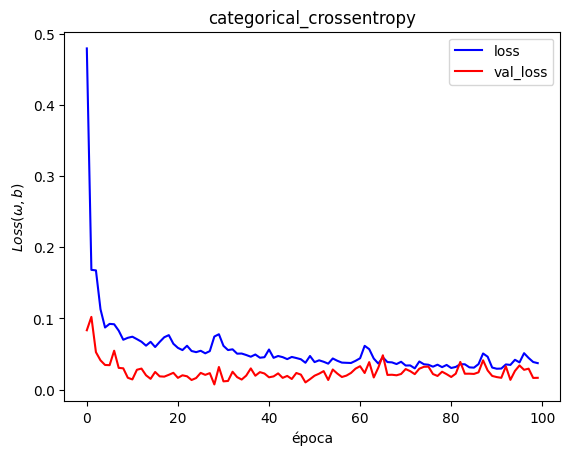

In [ ]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label='loss')
plt.plot(historial.epoch,historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.show()

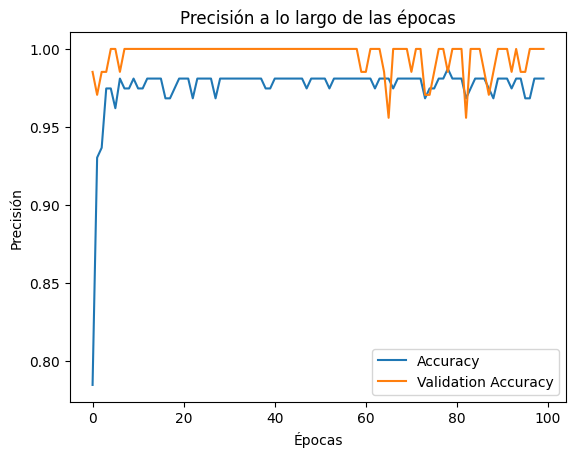

In [ ]:
plt.plot(best_historial2.history['categorical_accuracy'], label='Accuracy')
plt.plot(best_historial2.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

###Matriz de Confusión (confusio)

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class = y_pred.argmax(axis=-1)

In [ ]:
y_test_np = y_test.to_numpy()
y_test_class = y_test_np.argmax(axis=-1 )

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[34  3  0]
 [ 0 21  0]
 [ 0  0 40]]


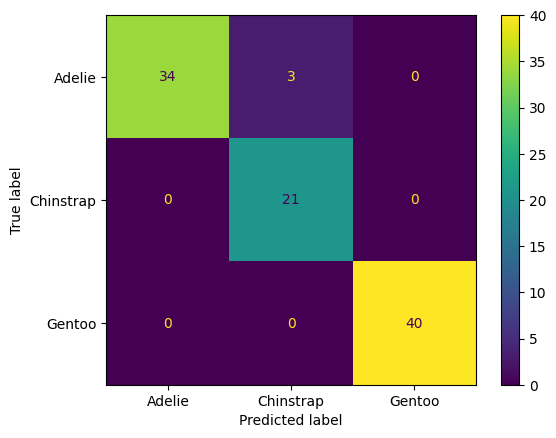

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = cm ,  display_labels = class_names).plot()
plt.show()

#MODELO 4 Variables escogidas basado en literatura cientifica sin escalar

In [ ]:
dfsn = df_dummie.drop(["body_mass_g","sex"], axis=1)

In [ ]:
dfsn

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo
0,2,39.1,18.7,181.0,1,0,0
1,2,39.5,17.4,186.0,1,0,0
2,2,40.3,18.0,195.0,1,0,0
4,2,36.7,19.3,193.0,1,0,0
5,2,39.3,20.6,190.0,1,0,0
...,...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,0,0,1
340,0,46.8,14.3,215.0,0,0,1
341,0,50.4,15.7,222.0,0,0,1
342,0,45.2,14.8,212.0,0,0,1


In [ ]:
df_x = dfsn.drop(["species_Adelie",	"species_Chinstrap",	"species_Gentoo"], axis=1)

In [ ]:
df_x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,2,39.1,18.7,181.0
1,2,39.5,17.4,186.0
2,2,40.3,18.0,195.0
4,2,36.7,19.3,193.0
5,2,39.3,20.6,190.0
...,...,...,...,...
338,0,47.2,13.7,214.0
340,0,46.8,14.3,215.0
341,0,50.4,15.7,222.0
342,0,45.2,14.8,212.0


In [ ]:
df_y = dfsn.drop(["island",	"bill_length_mm",	"bill_depth_mm",	"flipper_length_mm"], axis=1)

In [ ]:
df_y

,species_Adelie,species_Chinstrap,species_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


##Modelo de DL secuencial

In [ ]:
X_sr = df_x

In [ ]:
Y_sr = df_y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)

In [ ]:
inputs = keras.Input(shape=(X_train.shape[1],), name="pinguinos4")
hidden = Dense(15, activation = 'relu', input_dim = df.shape[1]) (inputs)
outputs = Dense(3, activation="sigmoid", name="predictions")(hidden)

modelo = keras.Model(inputs=inputs, outputs=outputs)

config  = modelo.get_config()
weights = modelo.get_weights()

In [ ]:
t = time.time()
mejores_parametros_val = {'acc':0,
                            'lr':0,
                            'opt': None,
                            'batch_size':0
                          }
BusquedaConcluida = False
for lr in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    for batch_s in [16,32,64]:
      for opt in [keras.optimizers.Adam( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr ), keras.optimizers.SGD( learning_rate = lr, momentum = 0.9 ), keras.optimizers.Nadam( learning_rate = lr )]:
            model = keras.Model.from_config(config)
            model.set_weights(weights)
            model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
            historial = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100,  verbose=0, batch_size = batch_s )
            pred = model.evaluate( X_val, y_val , verbose = 0 )
            print('lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1])
            if( pred[1] > mejores_parametros_val['acc'] ):
                mejores_parametros_val['acc']        = pred[1]
                mejores_parametros_val['lr']         = lr
                mejores_parametros_val['opt']        = opt
                mejores_parametros_val['batch_size'] = batch_s
                best_config    = model.get_config()
                best_weights   = model.get_weights()
                best_historial2 = historial
                print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',pred[1],'<--------------------')
                if( pred[1] == 1.0 ) :
                    print("Entrenamiento completo :) ")
                    BusquedaConcluida = True
                    break
      if( BusquedaConcluida == True ):
            break
    if( BusquedaConcluida == True ):
            break
print(f'Tiempo de entrenamiento {(time.time() - t)/60:.5f} mins')

lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd64229750> batch_size= 16 acc= 0.720588207244873
--------> lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd64229750> batch_size= 16 acc= 0.720588207244873 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd8d7b0790> batch_size= 16 acc= 0.23529411852359772
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6422aec0> batch_size= 16 acc= 0.7352941036224365
--------> lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd6422aec0> batch_size= 16 acc= 0.7352941036224365 <--------------------
lr= 0.0001 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd642292a0> batch_size= 16 acc= 0.720588207244873
lr= 0.0001 , opt= <keras.src.optimizers.adam.Adam object at 0x7edd6422bdf0> batch_size= 32 acc= 0.29411765933036804
lr= 0.0001 , opt= <keras.src.optimizers.sgd.SGD object at 0x7edd662edb70> batch_size= 32 acc= 0.23529411852359772
lr= 0.0001 , opt= <ker

In [ ]:
best_model = keras.Model.from_config(best_config)
best_model.set_weights(best_weights)

In [ ]:
#model = keras.Model.from_config(config)
#model.set_weights(weights)

lr =  mejores_parametros_val['lr']
opt = keras.optimizers.Nadam( learning_rate = lr )
batch_s = mejores_parametros_val['batch_size']
print('--------> lr=',lr, ', opt=',opt, 'batch_size=',batch_s ,'acc=',mejores_parametros_val['acc'])
best_model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'] )
scores_train = best_model.evaluate( X_train, y_train, verbose = 0 )
print(f'Precisión en el conjunto de entrenamiento = {np.round(scores_train[1]*100,decimals=2)}%')
scores_val = best_model.evaluate( X_val, y_val, verbose = 0 )
print(f'Precisión en el conjunto de validacion = {np.round(scores_val[1]*100,decimals=2)}%' )
scores_test = best_model.evaluate( X_test, y_test, verbose = 0 )
print(f'Precisión en el conjunto de prueba = {np.round(scores_test[1]*100,decimals=2)}%' )

--------> lr= 0.1 , opt= <keras.src.optimizers.nadam.Nadam object at 0x7edd6422beb0> batch_size= 32 acc= 0.970588207244873
Precisión en el conjunto de entrenamiento = 99.37%
Precisión en el conjunto de validacion = 97.06%
Precisión en el conjunto de prueba = 98.98%


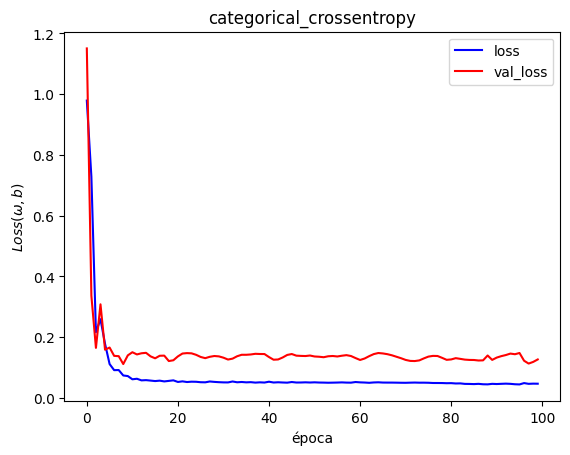

In [ ]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label='loss')
plt.plot(historial.epoch,historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.show()

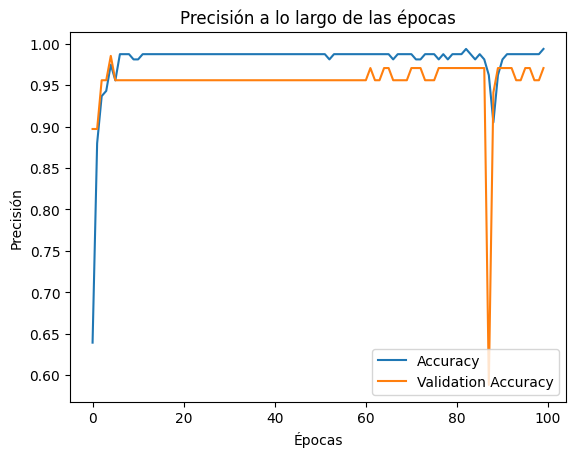

In [ ]:
plt.plot(best_historial2.history['categorical_accuracy'], label='Accuracy')
plt.plot(best_historial2.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

##Matriz de confusion

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
y_pred_class = y_pred.argmax(axis=-1)

In [ ]:
y_test_np = y_test.to_numpy()
y_test_class = y_test_np.argmax(axis=-1 )

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[41  2  0]
 [ 0 20  0]
 [ 0  0 35]]


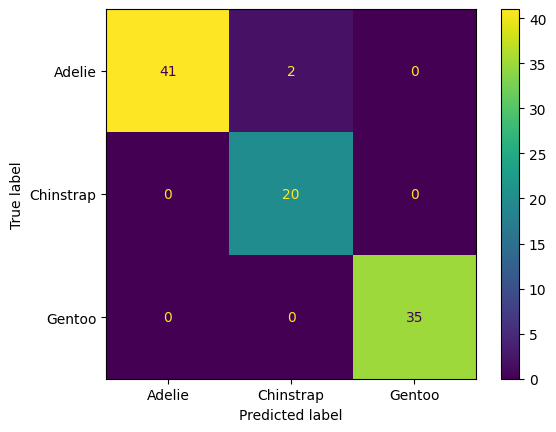

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = cm ,  display_labels = class_names).plot()
plt.show()